# Industrial Copper Modeling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_excel(r"C:\Users\igomp\OneDrive\Desktop\Projects_Data_scince\copper_project\Copper_Set.xlsx")

df.head(4)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00


# 1. Understanding the data

In [3]:
len(df['country'].unique())

18

In [4]:
len(df['customer'].unique())

1170

In [5]:
print(df.shape)

(181673, 14)


In [6]:
df.columns.values

array(['id', 'item_date', 'quantity tons', 'customer', 'country',
       'status', 'item type', 'application', 'thickness', 'width',
       'material_ref', 'product_ref', 'delivery date', 'selling_price'],
      dtype=object)

In [7]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
df_missingpercent = round((df.isnull().sum()*100/len(df)).sort_values(ascending=False),2)
df_missingpercent

material_ref     42.89
country           0.02
application       0.01
id                0.00
status            0.00
item_date         0.00
customer          0.00
thickness         0.00
delivery date     0.00
selling_price     0.00
quantity tons     0.00
item type         0.00
width             0.00
product_ref       0.00
dtype: float64

In [9]:
duplicates = df[df.duplicated()]
duplicates.shape

(0, 14)

In [10]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

# 2. Changing the data types of the columns and Dopping unwanted columns  

a. From df_missingpercent we can see that there is more than 40% data missing in 'material_ref','id' so we will drop the columns 

b. We can see that from the above table that 'quantity tons', 'item_date', 'delivery date' are having diffrent data types 

In [11]:
# dropping unwanted columns or the columns having more that 10% missing values 
df.drop(columns = ['material_ref','id'], inplace = True)

In [12]:
# changing the quantity tons column to numeric 
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

# changing the item_date, delivery date to date_time
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')

In [13]:
df.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [14]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,181670,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,181670,1.816720e+05
mean,2020-11-26 22:56:58.127374080,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2021-01-25 22:44:26.223372032,1.918036e+03
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,-1.160000e+03
25%,2020-09-29 00:00:00,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02
50%,2020-11-30 00:00:00,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02
75%,2021-02-03 00:00:00,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08
std,NaN,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,NaN,3.317956e+05


In [15]:
# Since quantity and selling price are measurements and cant be a negative value, changing negative values to 'Zero'
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x <= 0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x <= 0 else x)

In [16]:
# Also we can see that Delivery date is after item_date 
# Validating  and fix inconsistent dates by swapping

invalid_dates = df[df['delivery date'] < df['item_date']]
if not invalid_dates.empty:
    # Swap dates
    df.loc[invalid_dates.index, ['item_date', 'delivery date']] = df.loc[invalid_dates.index, ['delivery date', 'item_date']].values


In [17]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-04-01,644.33
3,2021-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-04-01,768.00
4,2021-03-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-04-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-01,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-02,591.00
181669,2020-07-01,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-02,589.00
181670,2020-07-01,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-02,619.00
181671,2020-07-01,NaN,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-02,601.00


In [18]:
df.isnull().sum()

item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

# 3. Filling missing values

In [19]:
#filling Missing values for categorical columns

df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace=True)
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0], inplace=True)
df['country'].fillna(df['country'].mode().iloc[0], inplace=True)


#filling Missing values for Numerical columns
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [20]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [21]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-04-01,644.33
3,2021-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-04-01,768.00
4,2021-03-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-04-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-01,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-02,591.00
181669,2020-07-01,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-02,589.00
181670,2020-07-01,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-02,619.00
181671,2020-07-01,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-02,601.00


In [22]:
df2 = df.copy()

# EDA

In [23]:
# Replace all values except 'Won' with 'Lost' so we can classify either as won or loss

df2['status'] = df2['status'].apply(lambda x: 'Won' if x == 'Won' else 'Lost')

In [24]:
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-04-01,644.33
3,2021-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-04-01,768.00
4,2021-03-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-04-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-01,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-02,591.00
181669,2020-07-01,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-02,589.00
181670,2020-07-01,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-02,619.00
181671,2020-07-01,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-02,601.00


In [25]:
categorical_columns = ['country', 'item type', 'application', 'product_ref' , 'status']

Numerical_columns = ['quantity tons','thickness','width' ,'customer', 'selling_price']


# Univarient Analysis Categorical Data

In [26]:
for variable in categorical_columns:
    print(df2[variable].value_counts())
    print("~"*50)

country
78.0     32112
26.0     27516
25.0     23362
27.0     21511
32.0     18658
28.0     15824
84.0     12776
77.0      9714
30.0      8702
39.0      3731
79.0      2742
38.0      1712
40.0      1683
80.0       819
113.0      714
89.0        92
107.0        5
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
application
10.0    77544
41.0    46261
15.0    20796
59.0     8927
42.0     5858
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       286
39.0      267
65.0      247
67.0      221
68.0      181
99.0      146
19.0      143
69.0      122
5.0       110
70.0      102
2.0        34
Name: count, dtype: in

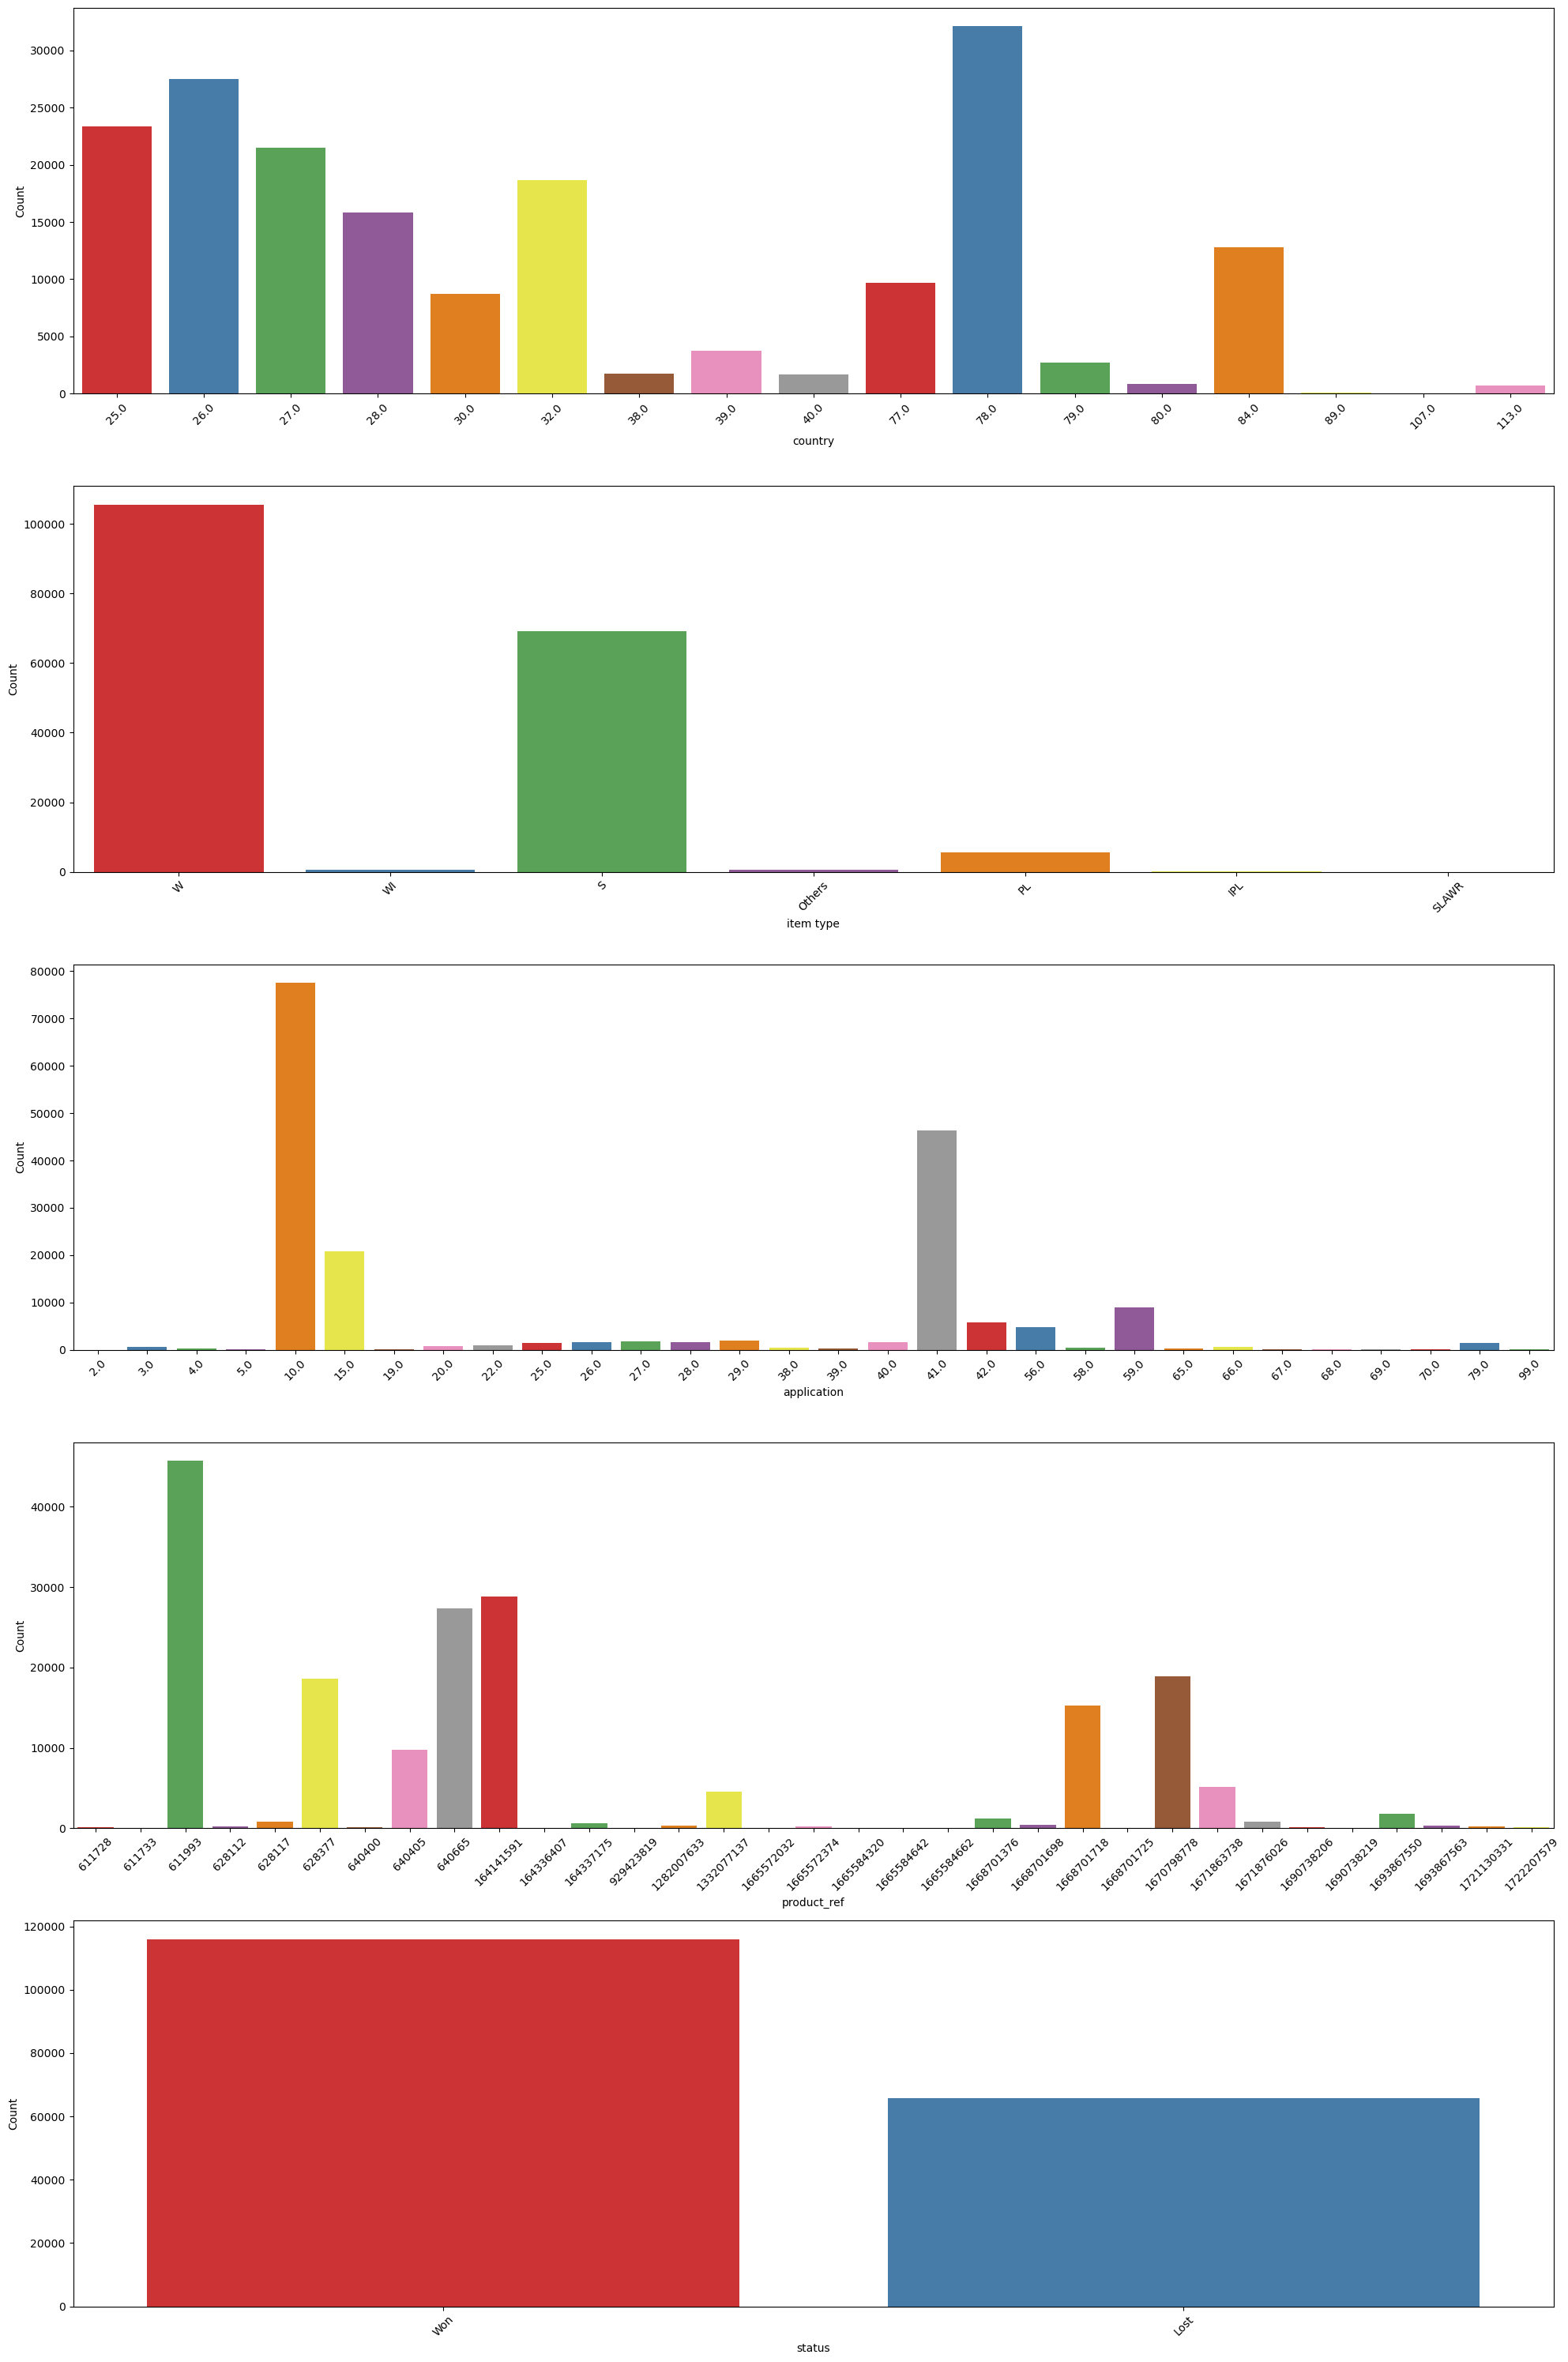

In [27]:
plt.figure(figsize=(20, 30))  # Adjust the figure size as needed
ind = 1
for variable in categorical_columns:
    plt.subplot(len(categorical_columns), 1, ind)
    sns.countplot(x=df2[variable], palette='Set1')
    plt.ylabel('Count')
    plt.xlabel(variable)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    ind += 1

plt.tight_layout()
plt.show()

Summary:

The data is unevenly distributed and imbalanced as the status column data does not have equal amount of counts for each category

In [28]:
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-04-01,644.33
3,2021-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-04-01,768.00
4,2021-03-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-04-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-01,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-02,591.00
181669,2020-07-01,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-02,589.00
181670,2020-07-01,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-02,619.00
181671,2020-07-01,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-02,601.00


# Finding Skewness and outliers

In [29]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

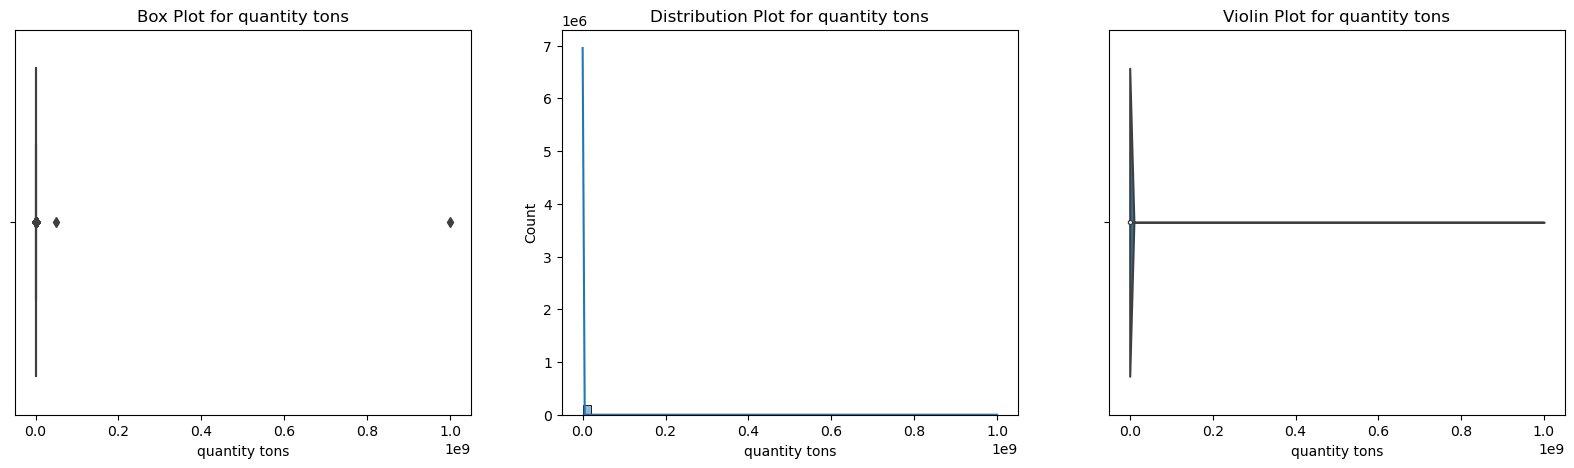

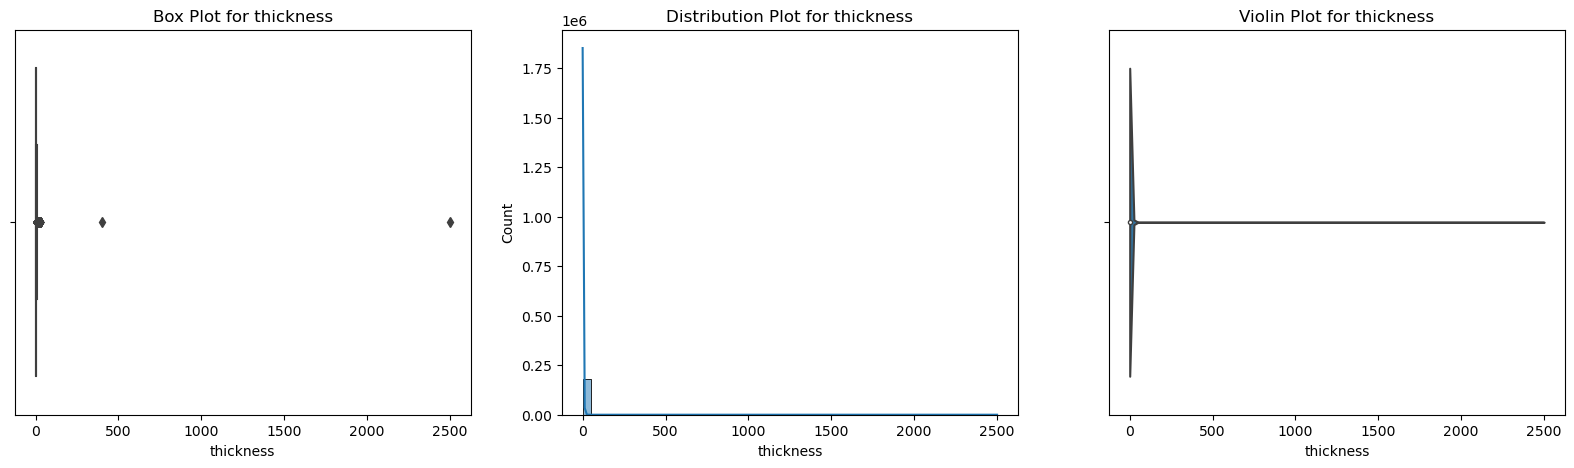

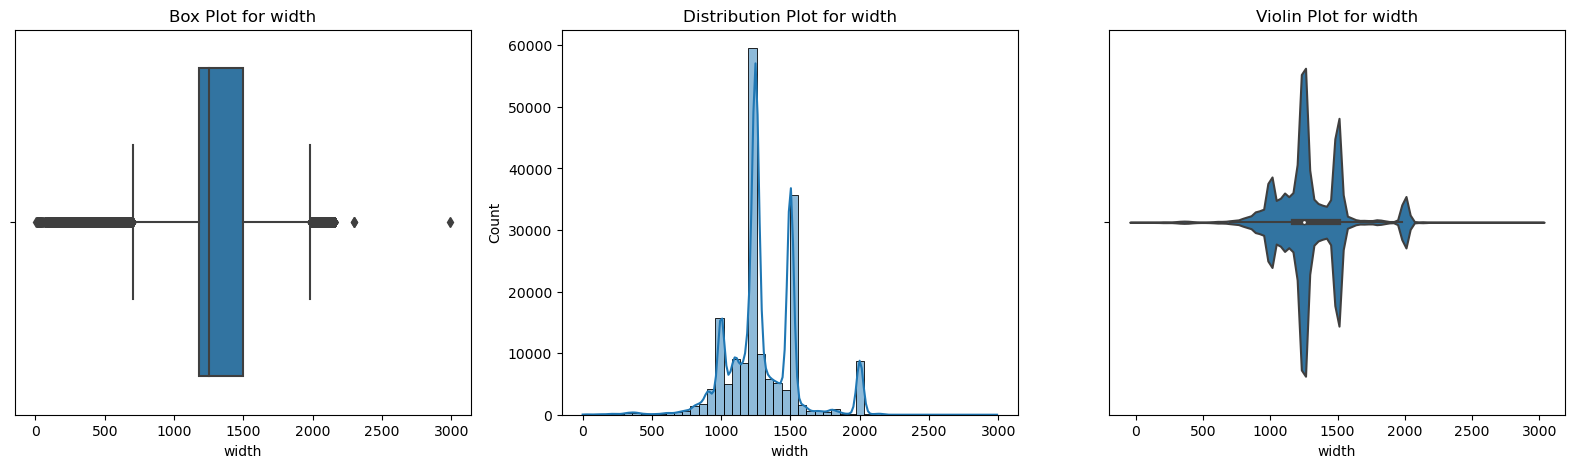

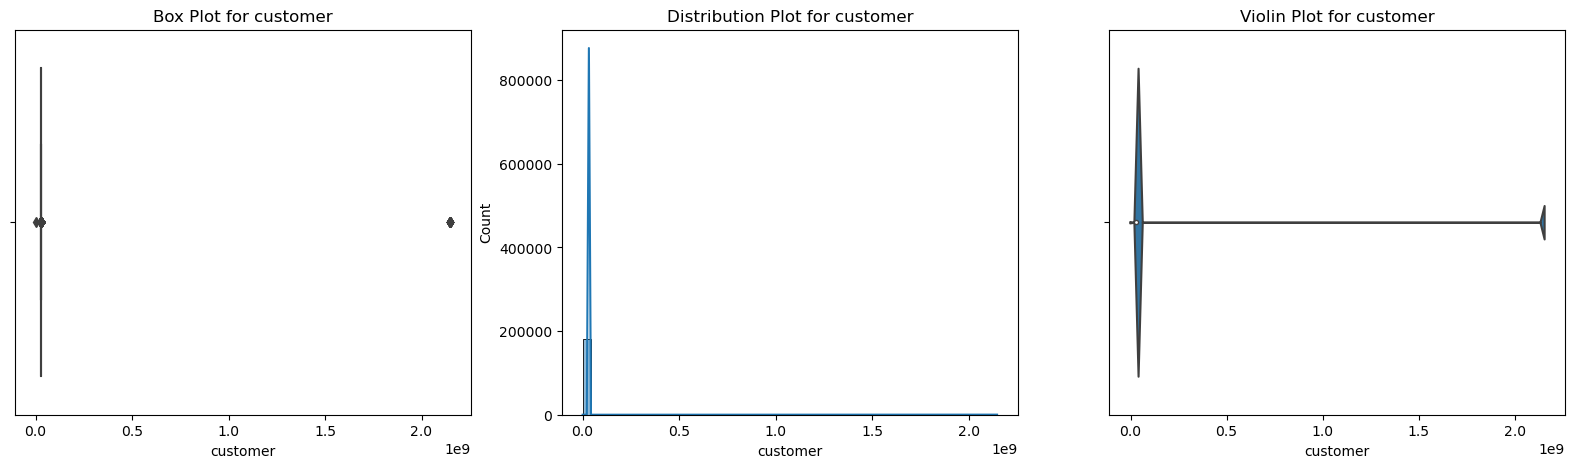

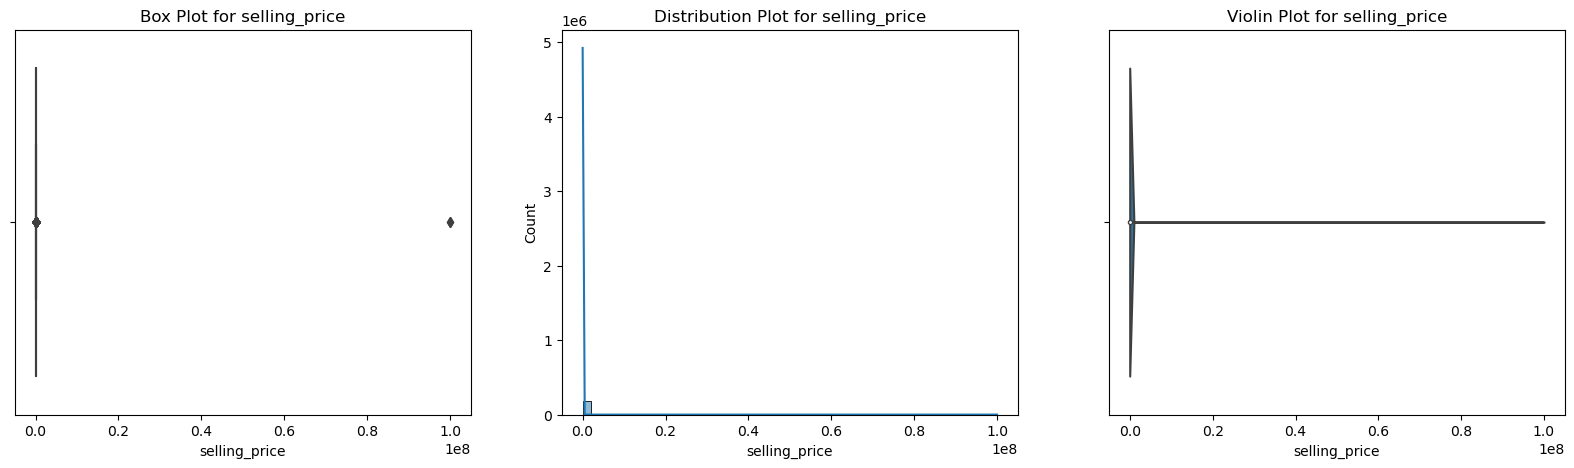

In [30]:
for i in Numerical_columns:
    plot(df2, i)

In [31]:
# Fixing Skewness Using Log transformation 
df2['quantity tons_log'] = np.log(df2['quantity tons'])
df2['thickness_log'] = np.log(df2['thickness'])
df2['selling_price_log'] = np.log(df2['selling_price'])
df2.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0,6.643822,-0.223144,6.953684


In [32]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
     

In [33]:
outlier(df2, 'quantity tons_log')
outlier(df2, 'thickness_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')
df2.head(4)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,2021-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-04-01,644.33,5.956169,-0.967584,6.468211
3,2021-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-04-01,768.00,5.310301,0.832909,6.643790


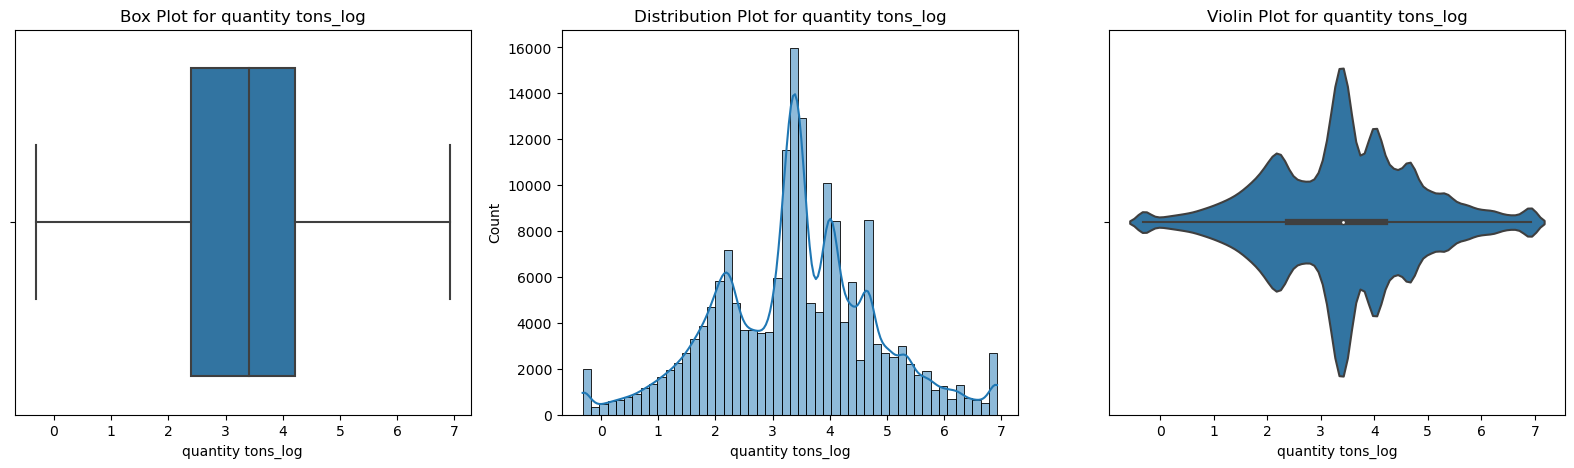

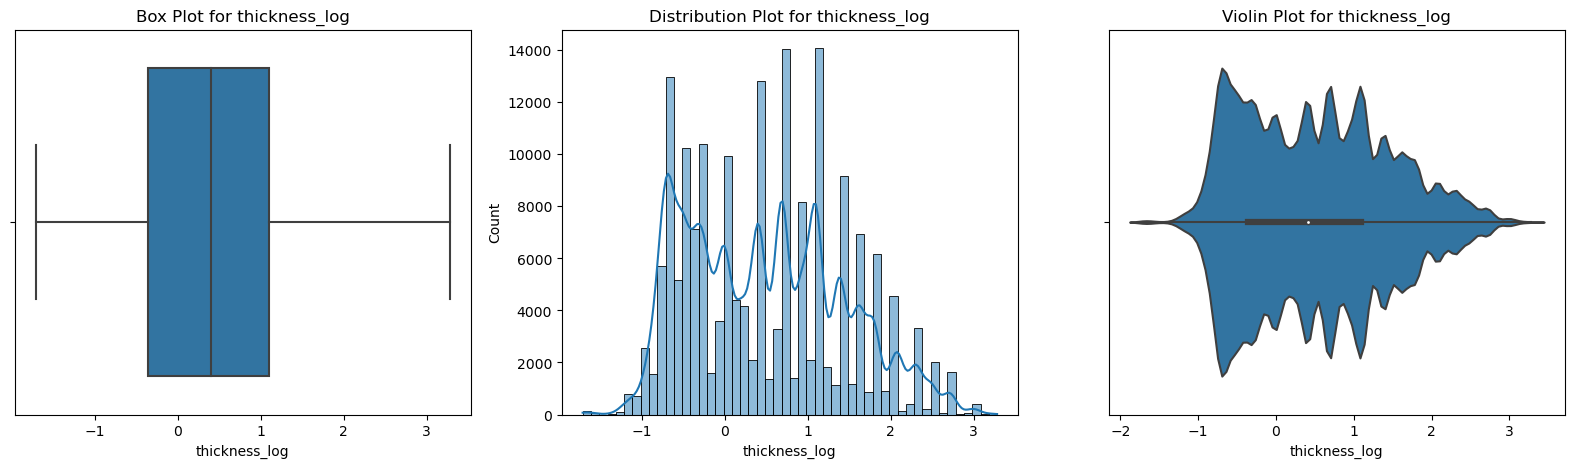

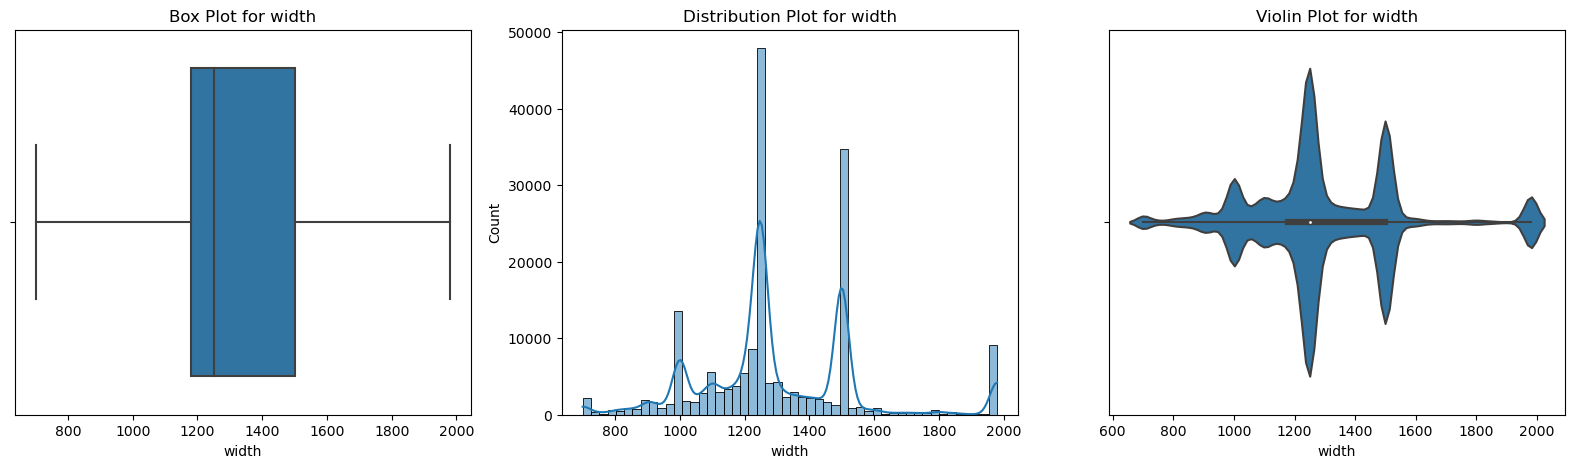

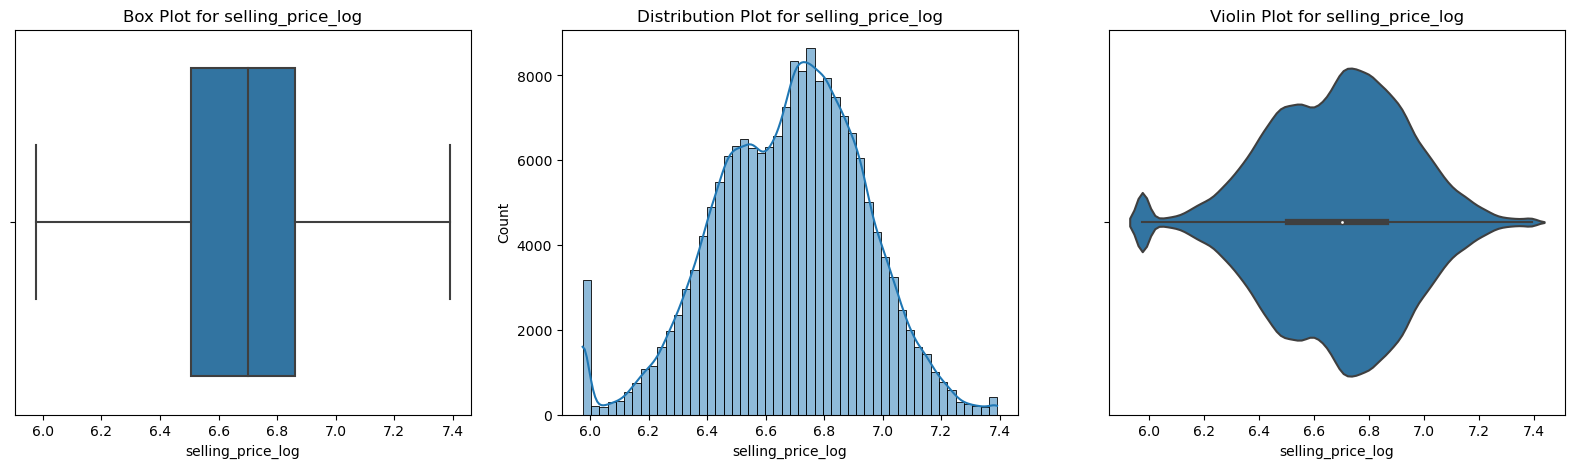

In [34]:
for i in ['quantity tons_log','thickness_log','width','selling_price_log']:
    plot(df2,i)

In [35]:
df2.drop(columns=['quantity tons', 'thickness', 'selling_price'], inplace = True, axis = 1)
df2.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684
2,2021-01-01,30153963.0,30.0,Won,WI,28.0,952.0,628377,2021-04-01,5.956169,-0.967584,6.468211
3,2021-01-01,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,2021-04-01,5.310301,0.832909,6.643790
4,2021-03-01,30211560.0,28.0,Won,W,10.0,1980.0,640665,2021-04-01,6.666354,1.386294,6.357842


In [36]:
df3 = df2.copy()

In [37]:
df3.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684
2,2021-01-01,30153963.0,30.0,Won,WI,28.0,952.0,628377,2021-04-01,5.956169,-0.967584,6.468211
3,2021-01-01,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,2021-04-01,5.310301,0.832909,6.643790
4,2021-03-01,30211560.0,28.0,Won,W,10.0,1980.0,640665,2021-04-01,6.666354,1.386294,6.357842


In [38]:
# Extract year, month, day, and weekday from both item_date & delivery date columns
for col in ['item_date', 'delivery date']:
    df3[f'{col}_year'] = df3[col].dt.year
    df3[f'{col}_month'] = df3[col].dt.month
    df3[f'{col}_day'] = df3[col].dt.day

df3.head(4)

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log,item_date_year,item_date_month,item_date_day,delivery date_year,delivery date_month,delivery date_day
0,2021-04-01,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,2021-07-01,3.991779,0.693147,6.749931,2021,4,1,2021,7,1
1,2021-04-01,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,2021-04-01,6.643822,-0.223144,6.953684,2021,4,1,2021,4,1
2,2021-01-01,30153963.0,30.0,Won,WI,28.0,952.0,628377,2021-04-01,5.956169,-0.967584,6.468211,2021,1,1,2021,4,1
3,2021-01-01,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,2021-04-01,5.310301,0.832909,6.643790,2021,1,1,2021,4,1


In [39]:
 df3.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date',
       'quantity tons_log', 'thickness_log', 'selling_price_log',
       'item_date_year', 'item_date_month', 'item_date_day',
       'delivery date_year', 'delivery date_month', 'delivery date_day'],
      dtype='object')

In [40]:
df3.shape

(181673, 18)

In [41]:
df3.drop(columns=['item_date', 'delivery date'], inplace=True, axis =1)
df3.head()

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_year,item_date_month,item_date_day,delivery date_year,delivery date_month,delivery date_day
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,2021,4,1,2021,7,1
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,2021,4,1,2021,4,1
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,5.956169,-0.967584,6.468211,2021,1,1,2021,4,1
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,5.310301,0.832909,6.643790,2021,1,1,2021,4,1
4,30211560.0,28.0,Won,W,10.0,1980.0,640665,6.666354,1.386294,6.357842,2021,3,1,2021,4,1


In [42]:
df3.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'item_date_year', 'item_date_month',
       'item_date_day', 'delivery date_year', 'delivery date_month',
       'delivery date_day'],
      dtype='object')

In [43]:
#used for prdiction of price
df4 = df3.copy()

In [44]:
df5 = df3.copy()

# Encoding and Scaling the data

In [45]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.model_selection import train_test_split

In [46]:
categorical_cols1 = [ 'country', 'status', 'item type', 'application', 'product_ref']
numerical_cols1 = ['customer','width','quantity tons_log', 'thickness_log',
       'item_date_year', 'item_date_month',
       'item_date_day', 'delivery date_year',
       'delivery date_month', 'delivery date_day']

In [47]:
# One-Hot Encoding of Categorical Variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical_data = encoder.fit_transform(df4[categorical_cols1])
encoded_categorical_cols = encoder.get_feature_names_out(categorical_cols1)
encoded_categorical_df1 = pd.DataFrame(encoded_categorical_data, columns=encoded_categorical_cols)



C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [48]:
scaler_features = StandardScaler()
scaler_target = StandardScaler()

# Scale Numerical Features
X_encoded_scaled = scaler_features.fit_transform(df4[numerical_cols1])

# Scale Target Variable
y_scaled = scaler_target.fit_transform(df4[['selling_price_log']])

In [49]:
# Combine scaled numerical data with encoded categorical data
X_encoded_combined1 = pd.concat([pd.DataFrame(X_encoded_scaled, columns=numerical_cols1), encoded_categorical_df1], axis=1)


In [52]:
# Initialize the scaler
# Splitting data for regression task
X_reg = X_encoded_combined1
y_reg =  y_scaled

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Regression/ Predicting Selling Price

In [53]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score

# Linear Regression

In [54]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_linear = linear_reg_model.predict(X_test_reg)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_linear)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.30409550575154076


# Ridge Regression

In [55]:
ridge_reg_model = Ridge()
ridge_reg_model.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_ridge = linear_reg_model.predict(X_test_reg)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_ridge)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.30409550575154076


# Lasso Regression

In [56]:
Laso_reg_model = Lasso()
Laso_reg_model.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_laso = linear_reg_model.predict(X_test_reg)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_laso)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.30409550575154076


# Decission Tree Regression

In [57]:
Decission_reg_model = DecisionTreeRegressor(max_depth=4)
Decission_reg_model.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_decission = Decission_reg_model.predict(X_test_reg)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_decission)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.35851004236247125


# Random Forest Regression

In [58]:
Randomforest_reg_model = RandomForestRegressor(n_estimators=10)
Randomforest_reg_model.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_random = Randomforest_reg_model.predict(X_test_reg)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_random)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test_reg, y_pred_random)
print('R-squared:', r2)

C:\Users\igomp\AppData\Local\Temp\ipykernel_13304\1134122980.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Randomforest_reg_model.fit(X_train_reg, y_train_reg)


Mean Squared Error: 0.07239047478860443
R-squared: 0.9272493077459097


# Gradient Boosting Regressor

In [59]:
gradient_reg_model = GradientBoostingRegressor()
gradient_reg_model.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_gradient = gradient_reg_model.predict(X_test_reg)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_gradient)
print(f"Mean Squared Error: {mse}")

C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.23855486591005107


# Best model for Regression:

We can see that Random forest regressor model has the best performance of the above models 

# Classification/ Finding satuts won or lost

In [60]:
categorical_cols2 = [ 'country','item type', 'application', 'product_ref']
numerical_cols2 = ['customer','width','quantity tons_log', 'thickness_log',
       'selling_price_log', 'item_date_year', 'item_date_month',
       'item_date_day', 'delivery date_year',
       'delivery date_month', 'delivery date_day']

In [63]:
# Initialize encoder for features and target separately
encoder_features = OneHotEncoder(drop='first', sparse=False)
encoder_target = OneHotEncoder(drop='first', sparse=False)

# Encode categorical features
encoded_categorical_data = encoder_features.fit_transform(df5[categorical_cols2])
encoded_categorical_cols = encoder_features.get_feature_names_out(categorical_cols2)
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoded_categorical_cols)

# Encode target variable
encoded_target_data = encoder_target.fit_transform(df3[['status']])
encoded_target_cols = encoder_target.get_feature_names_out(['status'])
encoded_target_df = pd.DataFrame(encoded_target_data, columns=encoded_target_cols)

# Initialize the scaler for price prediction
scaler_status = StandardScaler()

# Scale Numerical Features
X_encoded_scaled = scaler_status.fit_transform(df5[numerical_cols2])


# Combine encoded categorical data with numerical features
X_encoded_combined2 = pd.concat([pd.DataFrame(X_encoded_scaled, columns=numerical_cols2), encoded_categorical_df], axis=1)

# Splitting data for classification task
X_cls = X_encoded_combined2
y_cls = encoded_target_df

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
# Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_cls, y_train_cls)


# Logistic Regression 

In [65]:
log_model = LogisticRegression()
log_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test_cls)

# Calculate accuracy
accuracy = accuracy_score(y_test_cls, y_pred_log)
print(f"Accuracy: {accuracy}")
result1 = classification_report(y_test_cls, y_pred_log)
print("Classification Report:")
print(result1)

C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7340580707307004
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.72      0.66     13134
         1.0       0.82      0.74      0.78     23201

    accuracy                           0.73     36335
   macro avg       0.72      0.73      0.72     36335
weighted avg       0.75      0.73      0.74     36335



C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decission Tree classification

In [66]:
Decission_model = DecisionTreeClassifier()
Decission_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_decission = Decission_model.predict(X_test_cls)

# Calculate accuracy
accuracy = accuracy_score(y_test_cls, y_pred_decission)
print(f"Accuracy: {accuracy}")
result1 = classification_report(y_test_cls, y_pred_decission)
print("Classification Report:")
print(result1)

Accuracy: 0.9381863217283611
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91     13134
         1.0       0.95      0.95      0.95     23201

    accuracy                           0.94     36335
   macro avg       0.93      0.93      0.93     36335
weighted avg       0.94      0.94      0.94     36335



# Random Forest classification

In [67]:
Random_model = RandomForestClassifier(n_estimators=10)
Random_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_Random = Random_model.predict(X_test_cls)

# Calculate accuracy
accuracy = accuracy_score(y_test_cls, y_pred_Random)
print(f"Accuracy: {accuracy}")
result1 = classification_report(y_test_cls, y_pred_Random)
print("Classification Report:")
print(result1)

C:\Users\igomp\AppData\Local\Temp\ipykernel_13304\3668729837.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Random_model.fit(X_train_resampled, y_train_resampled)


Accuracy: 0.9483693408559241
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93     13134
         1.0       0.97      0.95      0.96     23201

    accuracy                           0.95     36335
   macro avg       0.94      0.95      0.94     36335
weighted avg       0.95      0.95      0.95     36335



# K Neighbors classification

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
KNeighbors_model = KNeighborsClassifier()
KNeighbors_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_KNeighbors = KNeighbors_model.predict(X_test_cls)

# Calculate accuracy
accuracy = accuracy_score(y_test_cls, y_pred_KNeighbors)
print(f"Accuracy: {accuracy}")
result1 = classification_report(y_test_cls, y_pred_KNeighbors)
print("Classification Report:")
print(result1)

C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9079124810788496
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88     13134
         1.0       0.95      0.90      0.93     23201

    accuracy                           0.91     36335
   macro avg       0.90      0.91      0.90     36335
weighted avg       0.91      0.91      0.91     36335



# ExtraTreesClassifier

In [70]:
from sklearn.ensemble import ExtraTreesClassifier

In [71]:
ExtraTree_model = ExtraTreesClassifier()
ExtraTree_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_ExtraTree = ExtraTree_model.predict(X_test_cls)

# Calculate accuracy
accuracy = accuracy_score(y_test_cls, y_pred_ExtraTree)
print(f"Accuracy: {accuracy}")
result1 = classification_report(y_test_cls, y_pred_ExtraTree)
print("Classification Report:")
print(result1)

C:\Users\igomp\AppData\Local\Temp\ipykernel_13304\2011703493.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ExtraTree_model.fit(X_train_resampled, y_train_resampled)


Accuracy: 0.9585248383101692
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     13134
         1.0       0.97      0.96      0.97     23201

    accuracy                           0.96     36335
   macro avg       0.95      0.96      0.96     36335
weighted avg       0.96      0.96      0.96     36335



# XGB classification

In [72]:
from xgboost import XGBClassifier

In [73]:
XGB_model = DecisionTreeClassifier()
XGB_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_XGB = XGB_model.predict(X_test_cls)

# Calculate accuracy
accuracy = accuracy_score(y_test_cls, y_pred_XGB)
print(f"Accuracy: {accuracy}")
result1 = classification_report(y_test_cls, y_pred_XGB)
print("Classification Report:")
print(result1)

Accuracy: 0.9369203247557452
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91     13134
         1.0       0.95      0.95      0.95     23201

    accuracy                           0.94     36335
   macro avg       0.93      0.93      0.93     36335
weighted avg       0.94      0.94      0.94     36335



# Best Model is ExtraTreesClassifier

1.Higher Accuracy: It achieved the highest accuracy among all models, indicating its strong overall performance on this dataset.

2.Balanced Performance: It maintains high precision and recall across both classes. This balance is critical in classification tasks, especially if the cost of false positives and false negatives is different.

3.Robustness: ExtraTreesClassifier is an ensemble method that aggregates the results of multiple decision trees. This ensemble approach typically results in better generalization and robustness compared to single models like Decision Trees or even other ensemble methods under certain conditions.

In [74]:
df2.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date',
       'quantity tons_log', 'thickness_log', 'selling_price_log'],
      dtype='object')

In [75]:
from joblib import dump

In [76]:
dump(ExtraTree_model, 'D:/Vscode/copper_project/ExtraTreesClassifier_model.joblib')
dump(Randomforest_reg_model, 'D:/Vscode/copper_project/RandomForestRegressor_model.joblib')

['D:/Vscode/copper_project/RandomForestRegressor_model.joblib']

In [77]:
dump(df3, 'D:/Vscode/copper_project/df.joblib')
# Dump columns for price
dump(categorical_cols1, 'D:/Vscode/copper_project/categorical_cols1.joblib')
dump(numerical_cols1, 'D:/Vscode/copper_project/numerical_cols1.joblib')

# Dump encoders for price
dump(encoder, 'D:/Vscode/copper_project/encoder.joblib')

# Dump scalers price
dump(scaler_features, 'D:/Vscode/copper_project/scaler_features.joblib')
dump(scaler_target, 'D:/Vscode/copper_project/scaler_target.joblib')



# Dump columns for status
dump(categorical_cols2, 'D:/Vscode/copper_project/categorical_cols2.joblib')
dump(numerical_cols2, 'D:/Vscode/copper_project/numerical_cols2.joblib')

# Dump encoders for status
dump(encoder_features, 'D:/Vscode/copper_project/encoder_features.joblib')
dump(encoder_target, 'D:/Vscode/copper_project/encoder_target.joblib')

# Dump scalers for status
dump(scaler_status, 'D:/Vscode/copper_project/scaler_status.joblib')




['D:/Vscode/copper_project/scaler_status.joblib']